In [57]:
import papermill as pm
import nbformat
import pandas as pd
from papermill.exceptions import PapermillExecutionError
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import json
import numpy as np
import os

In [58]:
def extract_values_from_notebook(output_notebook_path):
    nb = nbformat.read(output_notebook_path, as_version=4)
    for cell in nb.cells:
        if cell.cell_type == 'code':
            for output in cell.get('outputs', []):
                if output.output_type == 'stream' and 'name' in output and output['name'] == 'stdout':
                    if "algorithm_result" in output['text']:
                        # Assuming the output is JSON-formatted string following "algorithm_result"
                        result_str = output['text'].split("algorithm_result")[1].strip()
                        result_dict = json.loads(result_str)
                        return result_dict
    return None

In [59]:
# Initialize results list
results = []

# The path of the notebook where we run the algorithm
nb_path = '/Users/takeshine/Desktop/sample_size/example_core_paper.ipynb'

for i in range(20):
    file_path = f"/Users/takeshine/Desktop/sample_size/data/data_{i+1}.csv"

    sample_sizes = [100000, 10000, 1000, 100, 10]

    for sample_size in sample_sizes:
        output_path = f'/Users/takeshine/Desktop/sample_size/output/prefix_{sample_size}_index_{i}.ipynb'

        try:
            pm.execute_notebook(
                nb_path,
                output_path,
                parameters={
                    'csv_file_path': file_path,  # Pass the path to the CSV file
                    'sample_size': sample_size  # Pass the sample size
                }
            )
            # Extract results
            results_dict = extract_values_from_notebook(output_path)

            if results_dict is not None:
                results.append({
                    'lambda_index': i+1,
                    'sample_size': sample_size,
                    **results_dict
                })
        except PapermillExecutionError as e:
            print(f"Error executing the notebook with lambda_index={i+1}, sample_size={sample_size}: {e}")


Passed unknown parameter: csv_file_path
Passed unknown parameter: sample_size
Input notebook does not contain a cell with tag 'parameters'
Executing:   0%|          | 0/111 [00:00<?, ?cell/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Executing: 100%|██████████| 111/111 [00:16<00:00,  6.88cell/s]
Passed unknown parameter: csv_file_path
Passed unknown parameter: sample_size
Input notebook does not contain a cell with tag 'parameters'
Executing:   0%|          | 0/111 [00:00<?, ?cell/s]0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDE

In [60]:
# Convert to DataFrame
results_df = pd.DataFrame(results)
result_path = '/Users/takeshine/Desktop/sample_size/results_df.csv'
results_df.to_csv(result_path, index=False)  # Save to CSV without the index

In [61]:
results_df

,lambda_index,sample_size,shd,precision,recall,percentage_hidden_nodes_recovered,number_of_edges_esitimation,number_of_edges_true
0,1,100000,30,0.600000,0.352941,0.857143,20,34
1,1,10000,31,0.588235,0.294118,0.571429,17,34
2,1,1000,31,0.578947,0.323529,0.714286,19,34
3,1,100,39,0.391304,0.264706,1.571429,23,34
4,1,10,39,0.142857,0.029412,0.285714,7,34
...,...,...,...,...,...,...,...,...
95,20,100000,40,0.350000,0.205882,0.714286,20,34
96,20,10000,35,0.476190,0.294118,1.000000,21,34
97,20,1000,34,0.500000,0.323529,1.142857,22,34
98,20,100,33,0.533333,0.235294,0.714286,15,34


In [62]:
results_df['percentage_hidden_nodes_recovered'] = results_df['percentage_hidden_nodes_recovered']*100
results_df['Normalized SHD'] = results_df['shd'] / (results_df['number_of_edges_esitimation'] + results_df['number_of_edges_true'])

In [63]:
avg_results = results_df.groupby('sample_size')[['Normalized SHD', 'percentage_hidden_nodes_recovered','precision','recall']].mean().reset_index()

In [64]:
avg_results =  avg_results.sort_values(by = 'sample_size',ascending=True)

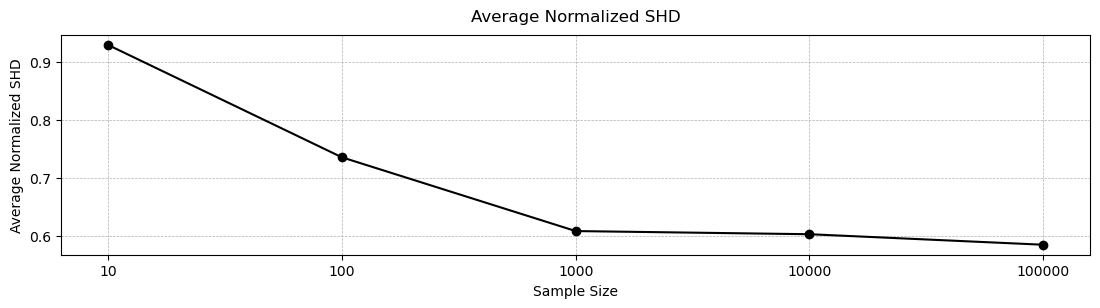

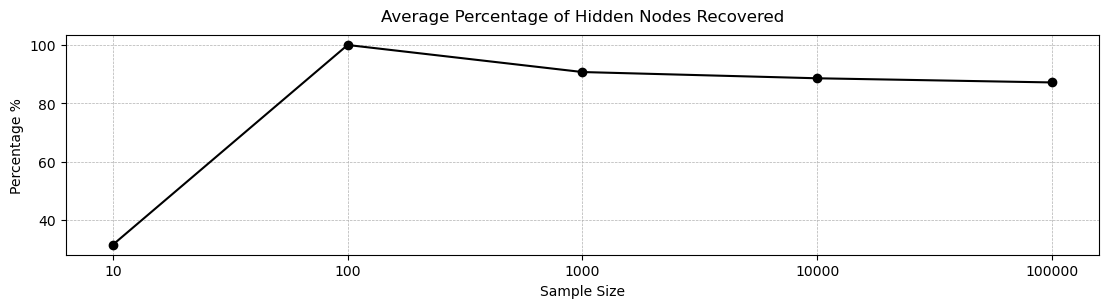

In [65]:
# Convert sample size to string to treat as categorical data
avg_results['sample_size_str'] = avg_results['sample_size'].apply(str)

# First plot: Normalized SHD
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(avg_results['sample_size_str'], avg_results['Normalized SHD'], color='black', marker='o', linestyle='-')
plt.title('Average Normalized SHD', pad=10)
plt.xlabel('Sample Size')
plt.ylabel('Average Normalized SHD')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(pad=4.0)
# Update the path for the first plot
save_path_shd = '/Users/takeshine/Desktop/sample_size/shd_03_28.png' # Make sure to update this path
plt.savefig(save_path_shd, dpi=300, bbox_inches='tight')
plt.show()

# Second plot: Percentage of Hidden Nodes Recovered
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(avg_results['sample_size_str'], avg_results['percentage_hidden_nodes_recovered'], color='black', marker='o', linestyle='-')
plt.title('Average Percentage of Hidden Nodes Recovered', pad=10)
plt.xlabel('Sample Size')
plt.ylabel('Percentage %')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(pad=4.0)
# Update the path for the second plot
save_path_percentage = '/Users/takeshine/Desktop/sample_size/percenatge_03_28.png'
plt.savefig(save_path_percentage, dpi=300, bbox_inches='tight')
plt.show()

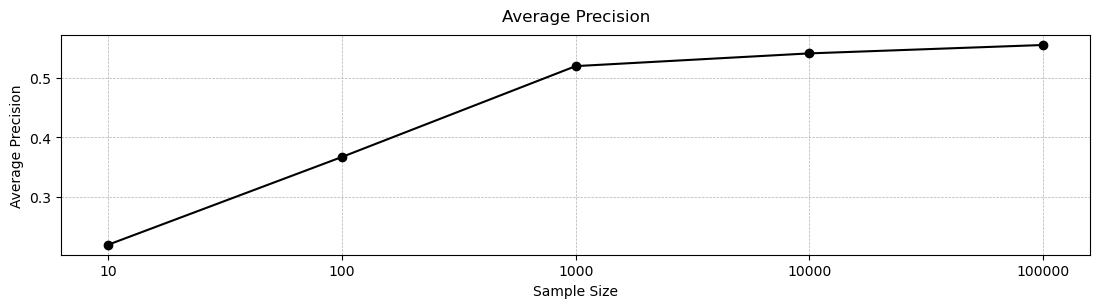

In [66]:
avg_results['sample_size_str'] = avg_results['sample_size'].apply(str)

# Plot Precision values
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(avg_results['sample_size_str'], avg_results['precision'], color='black', marker='o', linestyle='-')
plt.title('Average Precision', pad=10)
plt.xlabel('Sample Size')
plt.ylabel('Average Precision')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(pad=4.0)
# Update the path for the Precision plot
save_path_precision =  '/Users/takeshine/Desktop/sample_size/precision_03_28.png'
plt.savefig(save_path_precision, dpi=300, bbox_inches='tight')

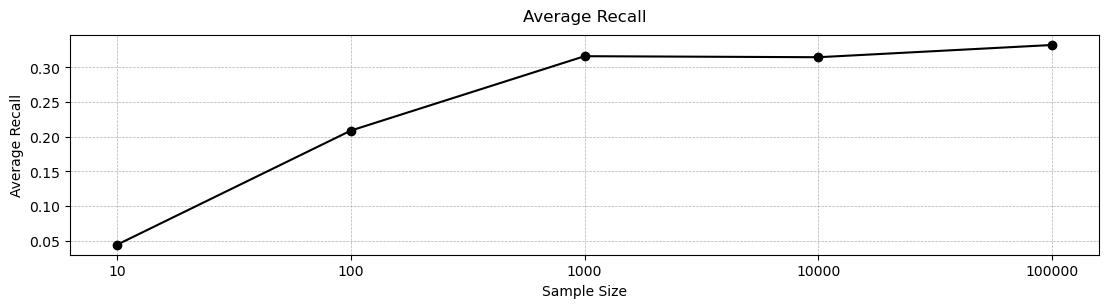

In [67]:
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed
plt.plot(avg_results['sample_size_str'], avg_results['recall'], color='black', marker='o', linestyle='-')
plt.title('Average Recall', pad=10)
plt.xlabel('Sample Size')
plt.ylabel('Average Recall')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout(pad=4.0)
# Update the path for the Recall plot
save_path_recall =  '/Users/takeshine/Desktop/sample_size/recall_03_28.png'
plt.savefig(save_path_recall, dpi=300, bbox_inches='tight')
plt.show()